# Aprendizaje automático con scikit-learn

[scikit-learn](http://scikit-learn.org) es una librería que ofrece una amplia funcionalidad tanto para aprendizaje [supervisado](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (clasificación y regresión) como para [no supervisado](http://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning) ([clustering](http://scikit-learn.org/stable/modules/clustering.html)).

## Ejemplo clasificación supervisada con SVM

Vamos a clasificar los datos iris utilizando [Support Vector Machines](http://scikit-learn.org/stable/modules/svm.html)


In [2]:
import numpy
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import random

In [3]:
iris = datasets.load_iris()
# Usamos las dos primeras columnas para hacerlo más difícil
datos = iris.data[:, :2]
clases = iris.target

# Ordenamos los datos de entrada al azar
indices = list(range(clases.shape[0]))
random.shuffle(indices)
datos = datos[indices,]
clases = clases[indices]

n_datos_training = int(datos.shape[0] * 0.75)
datos_training = datos[:n_datos_training, ]
clases_training = clases[:n_datos_training]
datos_test = datos[n_datos_training:, ]
clases_test = clases[n_datos_training:]

Definimos y entrenamos los modelos.

In [5]:
C = 1.0  # SVM regularization parameter
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))

for name, clasificador in zip(titles, models):
    clasificador.fit(datos_training, clases_training)
    clases_test_predichas = clasificador.predict(datos_test)
    n_aciertos = numpy.sum(clases_test_predichas == clases_test)
    porcentaje_acierto = n_aciertos / clases_test.shape[0] * 100
    print(name, porcentaje_acierto)

SVC with linear kernel 78.94736842105263
LinearSVC (linear kernel) 76.31578947368422
SVC with RBF kernel 81.57894736842105
SVC with polynomial (degree 3) kernel 78.94736842105263


/home/jose/analyses/py_industriales/.venv/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Clasificación no supervisada con K-means

Vamos a clasificar los datos iris en tres grupos con [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).



In [11]:
from sklearn import datasets
from sklearn.cluster import KMeans
from collections import defaultdict, Counter

iris = datasets.load_iris()
datos = iris.data
clases_reales = iris.target

# Ordenamos los datos de entrada al azar
indices = list(range(clases.shape[0]))
random.shuffle(indices)
datos = datos[indices,]
clases_reales = clases_reales[indices]


def comparar_clasificaciones(clasificacion1, clasificacion2):
    '''función para comparar las clasificaciones'''
    tabla_comparacion = defaultdict(Counter)
    for clase1, clase2 in zip(clasificacion1, clasificacion2):
        tabla_comparacion[clase1][clase2] += 1
    return tabla_comparacion

# Creamos los clusters
agrupacion = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(datos)
clases_predichas = agrupacion.labels_
tabla_comparacion = comparar_clasificaciones(clases_reales, clases_predichas)

print(tabla_comparacion)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

## Análisis de componentes principales (PCA)

Podemos utilizar scikit-learn para hacer [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). scikit-learn también incluye otros métodos de [descomposición](http://scikit-learn.org/stable/modules/decomposition.html) en componentes.

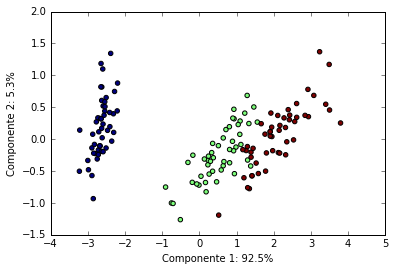

In [85]:
%matplotlib inline

from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt

iris = datasets.load_iris()
datos = iris.data
especies = iris.target

pca = decomposition.PCA(n_components=2)
pca.fit(datos)
proyeccion = pca.transform(datos)
varianza_explicada = pca.explained_variance_ratio_

plt.scatter(proyeccion[:, 0], proyeccion[:, 1], c=especies)
plt.xlabel('Componente 1: {:.1f}%'.format(varianza_explicada[0] * 100))
plt.ylabel('Componente 2: {:.1f}%'.format(varianza_explicada[1] * 100))